<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./441_Metop-ABC_GOME-2_O3_L2_exercise.ipynb"><< 441 - Metop-A/B/C GOME-2 - Ozone - Level 2 - Exercise</a>

<div class="alert alert-block alert-danger">
<b>40 - EXERCISES</b>
</div>

<div class="alert alert-block alert-danger">

<b>PREREQUISITES </b>

The following **30 - CASE STUDY** module is a prerequisite:

- [334 - Arctic Ozone hole 2020 - Metop-A/B/C IASI Level 2](../30_case_studies/334_stratospheric_ozone_Arctic_2020_Metop-ABC_IASI_O3_L2.ipynb)    
    
It is recommended to go through the module before you do this exercise workbook.
</div>

<hr>

# 4.4.2 Metop-A, -B, -C IASI Level-2 - Antarctic Ozone hole

This notebook is an `exercise workbook` which allows you to practise preparation of IASI Level-2 data to analyse and animate the Antarctic ozone hole in September 2020. 

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

### Outline

* [Load Metop-A/B/C IASI Total Column Ozone Level 2 data and aggregate it](#load_23)
* [Binning of Metop-A/B/C IASI Level 2 data onto a regular two-dimensional grid](#gridding_23)
* [*Optional: Loop through all the folders of Metop-A/B/C IASI Level 2 data and create daily gridded netCDF files*](#optional_loop_23)
* [Animate daily gridded Metop-A/B/C IASI Level 2 Ozone information for each day in September 2020](#animate_23) 

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_23'></a>Load Metop-A/B/C IASI Total Column Ozone Level-2 data and aggregate it

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an instrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/userMgmt/register.faces), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are originally disseminated in `BUFR` format. To download the data in `netCDF` format, visit the [IASI portal](https://iasi.aeris-data.fr/), which is implemented by AERIS. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

The following workflow uses data from the `Ozone (O`<sub>`3`</sub>`) total column` dataset.

### Load daily Metop-A/B/C IASI Total Column Ozone Level-2 data as `xarray.DataArray`

The first step is to load one file of Metop-A IASI Total Column Ozone Level 2 data as xarray.DataArray.

#### <a id='step1'></a>Load the Metop-A IASI Level 2 data

In [3]:
file_name_2a = '../eodata/iasi/nc/2a/2020/09/IASI_METOPA_L2_O3_COLUMN_20200901_ULB-LATMOS_V6.5.0.nc'

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens a netCDF file from the Metop-A IASI instrument for 1st September 2020. Call the resulting object `file_2a`.
The path to the file is stored under the variable `file_name_2a`.
    
<br>

**HINT:** <br>
You can use the xarray function `open_dataset()` for this operation.
</div>

In [4]:
# Enter your code below







In [5]:
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                             (time: 103946)
Coordinates:
  * time                                (time) float64 4.313e+08 ... 4.314e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPA ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 23:17:23 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPA_L2_CO_COLUMN_20200901_ULB-LATMOS...
    tracking_id:                 56bb5cf8-22d9-11eb-ac98-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-A
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.Dataset`:
- How many dimensions does the data array have?
- Is there an indication of how many data points were loaded?
- What `data variables` and `attributes` are available in the data file?
</div>

The loaded dataset has one dimension (`time`), with 103946 data points.<br>
Additionally, the data consists of 22 data variables, including `O3_total_column` information and 31 attributes.

<br>

#### Load the Metop-B IASI Level-2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `../eodata/iasi/o3/2b/2020/09/`.

In [6]:
file_name_2b = '../eodata/iasi/nc/2b/2020/09/IASI_METOPB_L2_O3_COLUMN_20200901_ULB-LATMOS_V6.5.0.nc'

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens a netCDF file from the Metop-B IASI instrument for 1st September 2020. Call the resulting object `file_2b`.
The path to the file is stored under the variable `file_name_2b`.
    
<br>

**HINT:** <br>
You can use the xarray function `open_dataset()` for this operation.
</div>

In [7]:
# Enter your code below








In [8]:
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:                             (time: 103718)
Coordinates:
  * time                                (time) float64 4.313e+08 ... 4.314e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPB ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 23:17:46 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPB_L2_CO_COLUMN_20200901_ULB-LATMOS...
    tracking_id:                 64881a06-22d9-11eb-bd4c-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

#### Load the Metop-C IASI Level-2 data

And the same procedure is repeated again for the IASI Level-2 Ozone data files of Metop-C. The data files are in the folder directory `../eodata/iasi/o3/2c/2020/09/`.

In [9]:
file_name_2c = '../eodata/iasi/nc/2c/2020/09/IASI_METOPC_L2_O3_COLUMN_20200901_ULB-LATMOS_V6.5.0.nc'

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens a netCDF file from the Metop-C IASI instrument for 1st September 2020. Call the resulting object `file_2c`.
The path to the file is stored under the variable `file_name_2c`.
    
<br>

**HINT:** <br>
You can use the xarray function `open_dataset()` for this operation.
</div>

In [10]:
# Enter your code below








In [11]:
file_2c = xr.open_dataset(file_name_2c)
file_2c

<xarray.Dataset>
Dimensions:                             (time: 103165)
Coordinates:
  * time                                (time) float64 4.313e+08 ... 4.314e+08
Data variables:
    time_string                         (time) |S16 ...
    time_in_day                         (time) float64 ...
    latitude                            (time) float32 ...
    longitude                           (time) float32 ...
    solar_zenith_angle                  (time) float32 ...
    satellite_zenith_angle              (time) float32 ...
    orbit_number                        (time) int64 ...
    scanline_number                     (time) int32 ...
    pixel_number                        (time) int32 ...
    ifov_number                         (time) int32 ...
    retrieval_quality_flag              (time) int32 ...
    surface_altitude                    (time) float32 ...
    tropopause_altitude                 (time) float32 ...
    O3_total_column                     (time) float32 ...
    O3_total_column_error               (time) float32 ...
    O3_tropospheric_column              (time) float32 ...
    O3_tropospheric_column_error        (time) float32 ...
    O3_surface_6km_column               (time) float32 ...
    O3_surface_6km_column_error         (time) float32 ...
    O3_total_degrees_of_freedom         (time) float32 ...
    O3_tropospheric_degrees_of_freedom  (time) float32 ...
    O3_surface_6km_degrees_of_freedom   (time) float32 ...
Attributes:
    title:                       IASI/METOPC ULB-LATMOS ozone (O3) L2 product...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-11-09 23:18:16 (date of data extraction...
    summary:                     This dataset contains Level 2 ozone column p...
    source:                      EUMETSAT IASI Level 2 ozone (O3) data versio...
    references:                  Reference to the O3 retrieval: FORLI radiati...
    id:                          IASI_METOPC_L2_CO_COLUMN_20200901_ULB-LATMOS...
    tracking_id:                 7660480c-22d9-11eb-8b2b-002590591942
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,ozone,O3,le...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-C
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

### Generate a `xarray.DataArray` with latitude and longitude as coordinates

The next step is to bring the information from the netCDF files into a `xarray.DataArray` structure, as this is a flexible format to handle and visualize the data.

#### Generate a `DataArray` for the Metop-A IASI Level-2 data

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which generates a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `O3_total_column` information as data values.<br>
Call the object `o3_da_2a`.
    
<br>

**HINT:** <br>
You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) for this operation.
</div>

In [12]:
# Enter your code below








In [13]:
o3=file_2a['O3_total_column']
o3_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=file_2a.title,
                                    no_of_dims=1, 
                                    unit='mol m-2')
o3_da_2a

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 103946)>
array([0.12791449, 0.12910458, 0.1355791 , ..., 0.13761164, 0.14026208,
       0.14083448], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -72.12 -72.14 -71.6 ... -34.24 -34.23
    longitude  (ground_pixel) float32 125.0 120.5 115.8 ... -38.0 -39.52 -42.62
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-B IASI Level-2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-B satellite.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which generates a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `O3_total_column` information as data values.<br>
Call the object `o3_da_2b`.
    
<br>

**HINT:** <br>
You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) for this operation.
</div>

In [14]:
# Enter your code below








In [15]:
o3=file_2b['O3_total_column']
o3_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=o3.long_name, 
                                    no_of_dims=1, 
                                    unit=o3.units)
o3_da_2b

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 103718)>
array([0.11778803, 0.11986336, 0.12168705, ..., 0.14612183, 0.13896735,
       0.14709212], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -15.63 -15.24 -15.14 ... 59.78 60.28 60.85
    longitude  (ground_pixel) float32 -42.21 -41.4 -40.92 ... -45.4 -40.06
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

<br>

#### Generate a `DataArray` for the Metop-C IASI Level-2 data

Finally, the same procedure is repeated again for the IASI Level-2 Ozone data files of Metop-C.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which generates a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `O3_total_column` information as data values.<br>
Call the object `o3_da_2a`.
    
<br>

**HINT:** <br>
You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) for this operation.
</div>

In [16]:
# Enter your code below










In [17]:
o3=file_2c['O3_total_column']
o3_da_2c = generate_xr_from_1D_vec(file=file_2c, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=o3, 
                                    parameter_name=o3.standard_name, 
                                    longname=o3.long_name, 
                                    no_of_dims=1, 
                                    unit=o3.units)
o3_da_2c

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 103165)>
array([0.1256646 , 0.12060393, 0.12210791, ..., 0.16683312, 0.16256686,
       0.16646431], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 23.03 23.48 23.37 ... -48.06 -48.11 -48.15
    longitude  (ground_pixel) float32 156.9 155.2 155.6 ... 133.3 132.6 132.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved ozone total column in mole/m2
    units:      mol m-2

#### Combine the three O<sub>3</sub> data arrays from Metop-A, Metop-B and Metop-C with `xarray.concat`

Now, we can concatenate all the `xarray.DataArrays` from Metop-A, Metop-B and Metop-C into one single `DataArray`. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which concatenates the pixel information from the three data arrays `o3_da_2a`, `o3_da_2b` and `o3_da_2c`. As concatenation dimension, you can specify the dimension `ground_pixel`.
    
<br>

**HINT:** <br>
You can use xarray's function `xr.concat()` for this operation.
</div>

In [18]:
# Enter your code below








In [19]:
data_abc = xr.concat([o3_da_2a,o3_da_2b,o3_da_2c],dim='ground_pixel')
data_abc

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 310829)>
array([0.12791449, 0.12910458, 0.1355791 , ..., 0.16683312, 0.16256686,
       0.16646431], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -72.12 -72.14 -71.6 ... -48.11 -48.15
    longitude  (ground_pixel) float32 125.0 120.5 115.8 ... 133.3 132.6 132.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      mol m-2

<div class="alert alert-block alert-success">
<b>Question:</b><br>
Inspect the concatenated data array:
- What is the total number of ground pixels?
</div>

The concatenated data array has a total amount of 310829 ground pixels.

<br>

#### Convert from molecules per metre square to Dobson Unit by applying a multiplication factor

The unit of the data is `molecules per metre square`. Ozone is often expressed in Dobson units, so we will convert the units to Dobson units instead. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which converts `Molecules per meter square` to `Dobson Unit [DU]` and name the data array `data_abc_du`.<br>
Reassign the attributes to the resulting data array and then change the units stored in the attributes to `Dobson Unit`.
    
<br>

**HINT:** <br>
You can convert `molecules per metre square` to `Dobson Unit [DU]` by muliplying the values with 2241.147.
</div>

In [20]:
# Enter your code below









In [21]:
# Convert to Dobson Units
data_abc_du = data_abc * 2241.147

# Add the attributes back
data_abc_du.attrs = data_abc.attrs

# Change units label to Dobson Unit
data_abc_du.attrs['units'] = 'Dobson Unit'

data_abc_du

<xarray.DataArray 'atmosphere_mole_content_of_ozone' (ground_pixel: 310829)>
array([286.67517, 289.34235, 303.8527 , ..., 373.89752, 364.3362 ,
       373.07098], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -72.12 -72.14 -71.6 ... -48.11 -48.15
    longitude  (ground_pixel) float32 125.0 120.5 115.8 ... 133.3 132.6 132.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      Dobson Unit

<br>

## <a id='gridding_23'></a>Bin the Metop-A/B/C IASI data

### Binning of Metop-A/B/C IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `o3_da_2abc_du` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `ozone` as variables x, y, z.

In [22]:
y = data_abc_du.latitude.data
x = data_abc_du.longitude.data
z = data_abc_du.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

The next step is to bin the data onto a pre-defined two-dimensional grid (called bins).

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which bins the data onto a 1x1 degree grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin.<br>
    
Afterwards, build the arithmetic mean of all the data fallen into a bin with the help of the `counts` array.<br>
    
<br>

**HINT:** <br>
You can use the function `np.histogram2d` for this operation. A 1x1 degree grid is represented with `bins=(180,360)`.

</div>

In [23]:
# Enter your code below









In [24]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[         nan, 233.5401001 ,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 268.39814758,          nan, ..., 262.40866089,
        256.10681152,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Ozone information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [25]:
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': pd.to_datetime('2020-03-02'),
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': data_abc_du.long_name, 'units': data_abc_du.units},
                name='O3'
            )

xarray_abc

<xarray.DataArray 'O3' (latitude: 180, longitude: 360)>
array([[         nan, 233.5401001 ,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan, 268.39814758,          nan, ..., 262.40866089,
        256.10681152,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    time       datetime64[ns] 2020-03-02
  * latitude   (latitude) float64 -89.93 -88.94 -87.94 ... 86.72 87.72 88.72
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  IASI/METOPA ULB-LATMOS ozone (O3) L2 products (total, troposp...
    units:      Dobson Unit

<br>

## <a id='visualize_23'></a>Visualize the Metop-A/B/C IASI data on the Antarctic

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_pcolormesh`

Let us visualize the gridded Ozone information for 1 September 2020. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh). As projection, you can use `ccrs.Orthographic` and set the latitude and longitude information to Antarctica. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which visualizes the data array `xarray_abc` on a `orthographic` projection. <br>
    

    
<br>

**HINT:** <br>
You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

</div>

In [26]:
# Enter your code below








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Retrieved Ozone total column in DU for 1 September 2020 (IASI Level-2)'}>)

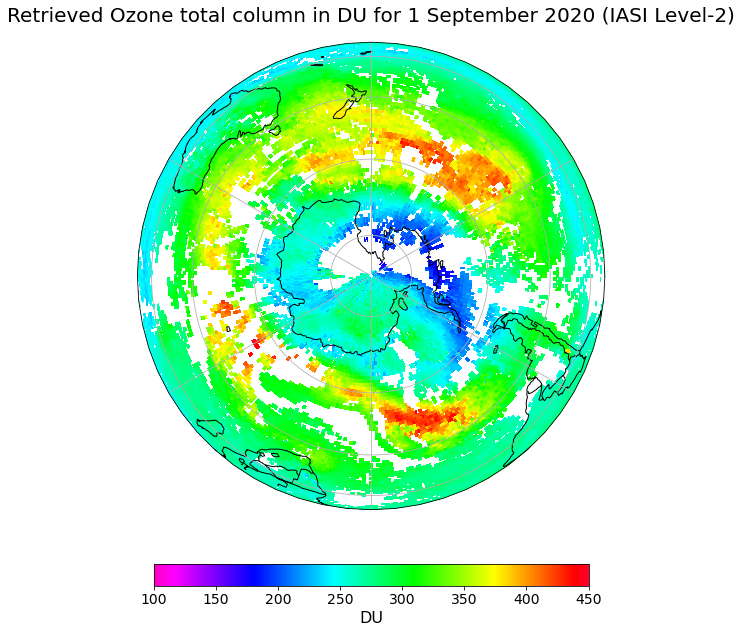

In [27]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(180,-90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='Retrieved Ozone total column in DU for 1 September 2020 (IASI Level-2)', 
                     vmin=100, 
                     vmax=450)

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./441_Metop-ABC_GOME-2_O3_L2_exercise.ipynb"><< 441 - Metop-A/B/C GOME-2 - Ozone - Level 2 - Exercise</a>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>